# Support Vector Machines

## Step 0: Project Setup

### Importing the Libraries 

In [26]:
# Scikit-learn utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importing the Dataset

NOTE: THERE IS ERROR IN UTILS.PY, FOR ONE OF THE FEATURES -> TELL CHARLIE TO FIX FIRST

In [4]:
import sys
import os
import pandas as pd

# To allow for importing of 'utils' module from parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from utils import import_data

dataset_path = "../data"
dataset_version = "automated-v1.0"

automated_dataset = import_data(dataset_path, dataset_version)

automated_dataframe = automated_dataset["dataframe"]

X = automated_dataframe.iloc[:, :-1]  # All columns except the last one
y = automated_dataframe.iloc[:, -1]  # The last column

# Dropped upload times because pre-processing too much work (calculating std)
X = X.drop(columns=['mediaUpload_times'])

print(X.head())
print(X.tail())

   user_media_count  user_follower_count  user_following_count  \
0                97                 1612                  7108   
1               863                 3028                   912   
2               149                 5213                  1157   
3                33                12423                  1763   
4              1000                 9496                  2412   

   user_has_highligh_reels  user_has_external_url  user_tags_count  \
0                        0                      1               36   
1                        1                      0               77   
2                        1                      1               56   
3                        0                      0                2   
4                        1                      0               91   

   follower_following_ratio  user_biography_length  username_length  \
0                  0.226787                    133               12   
1                  3.320175             

## Step 1: Data Preprocessing & Scaling

### Aggregating Non-numeric Data

Because some of the features have non-numeric values (lists), we should first either aggregate their values into a single value, or just remove them all together.

In [5]:
# Aggregate Features with non-numeric values

X['media_comment_numbers'] = X['media_comment_numbers'].apply(lambda i: np.mean(i) if len(i) > 0 else 0)
X['media_hashtag_numbers'] = X['media_hashtag_numbers'].apply(lambda i: np.mean(i) if len(i) > 0 else 0)
X['media_like_numbers'] = X['media_like_numbers'].apply(lambda i: np.mean(i) if len(i) > 0 else 0)

# binary features to be summed
X['media_comments_are_disabled'] = X['media_comments_are_disabled'].apply(np.sum)
X['media_has_location_info'] = X['media_has_location_info'].apply(np.sum)


### Splitting the Data

In [6]:
# Splitting the dataset (20% Testing, 20% Validating, 60% Training)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.2, random_state=42, shuffle=True, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.25, random_state=42, shuffle=True, stratify=y_train_val
)

print(np.unique(y_train, return_counts=True))

# Check if splits are correct
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

(array([0, 1], dtype=int64), array([420, 420], dtype=int64))
X_train:(840, 15)
y_train:(840,)
X_val: 	(280, 15)
y_val: 	(280,)
X_test: (280, 15)
y_test: (280,)


### Scaling the Data

In [7]:
# Scale Input Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train[0:2])

[[-0.47053333 -0.04059714  3.32524774 -0.96720415 -0.66580701 -0.03792806
  -0.05718309  1.64736904  1.05241263 -0.33696283 -0.0172352  -0.08145478
  -0.48359663 -0.70042572  0.00538244]
 [-0.10630055 -0.05354655 -0.72847212 -0.96720415 -0.66580701 -0.03784087
  -0.05571236 -1.12061692  0.27170029 -0.33696283 -0.22427415 -0.08145478
  -0.30914672 -0.54908037 -0.06312787]]


## Step 2: Data Transformations

Regularization Values (C)

In [13]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

### Linear Kernel

C=0.001:
Train Accuracy: 0.8547619047619047
Validation Accuracy: 0.85
Test Accuracy: 0.8678571428571429

C=0.01:
Train Accuracy: 0.8845238095238095
Validation Accuracy: 0.9
Test Accuracy: 0.9035714285714286

C=0.1:
Train Accuracy: 0.9
Validation Accuracy: 0.9107142857142857
Test Accuracy: 0.9107142857142857

C=1:
Train Accuracy: 0.9119047619047619
Validation Accuracy: 0.9107142857142857
Test Accuracy: 0.9392857142857143

C=10:
Train Accuracy: 0.9202380952380952
Validation Accuracy: 0.9285714285714286
Test Accuracy: 0.925

C=100:
Train Accuracy: 0.9261904761904762
Validation Accuracy: 0.9178571428571428
Test Accuracy: 0.9285714285714286



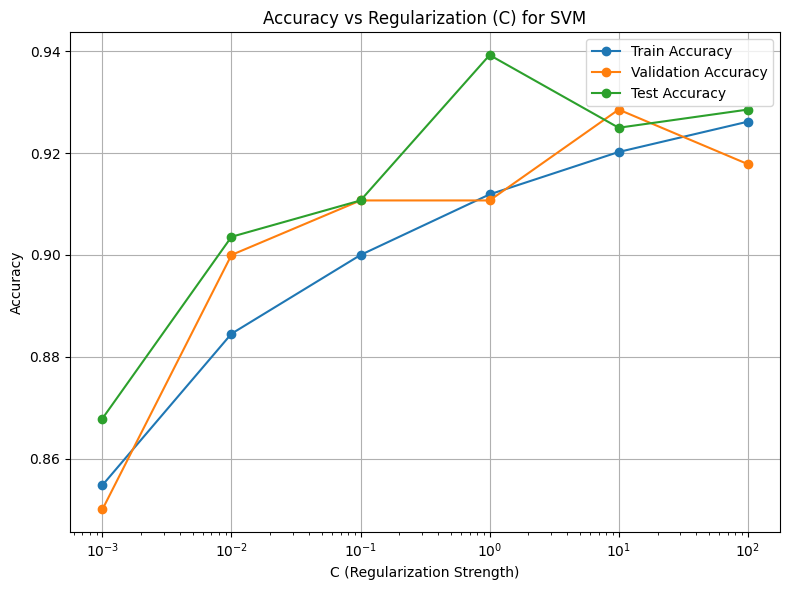

In [32]:
from sklearn import svm

for c in c_values:
    # initialize svc
    svm_linear = svm.SVC(kernel='linear', C=c)

    # train model / fit to training data
    svm_linear.fit(X_train, y_train)

    print(f'C={c}:')

    # train accuracy
    train_prediction = svm_linear.predict(X_train)
    train_accuracy = np.mean(train_prediction == y_train)
    print(f'Train Accuracy: {train_accuracy}')

    # validation accuracy
    val_prediction = svm_linear.predict(X_val)
    val_accuracy = np.mean(val_prediction == y_val)
    print(f'Validation Accuracy: {val_accuracy}')

    # test accuracy
    test_prediction = svm_linear.predict(X_test)
    test_accuracy = np.mean(test_prediction == y_test)
    print(f'Test Accuracy: {test_accuracy}\n')


train_accuracies = [0.8547619047619047, 0.8845238095238095, 0.9, 0.9119047619047619, 0.9202380952380952, 0.9261904761904762]
val_accuracies = [0.85, 0.9, 0.9107142857142857, 0.9107142857142857, 0.9285714285714286, 0.9178571428571428]
test_accuracies = [0.8678571428571429, 0.9035714285714286, 0.9107142857142857, 0.9392857142857143, 0.925, 0.9285714285714286]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(c_values, val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(c_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xscale('log')  # Because C is usually plotted on a log scale
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization (C) for SVM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Polynomial Kernel

C=0.001:
Train Accuracy: 0.513095238095238
Validation Accuracy: 0.5071428571428571
Test Accuracy: 0.5142857142857142

C=0.01:
Train Accuracy: 0.5547619047619048
Validation Accuracy: 0.5357142857142857
Test Accuracy: 0.5642857142857143

C=0.1:
Train Accuracy: 0.7476190476190476
Validation Accuracy: 0.7107142857142857
Test Accuracy: 0.75

C=1:
Train Accuracy: 0.8761904761904762
Validation Accuracy: 0.8392857142857143
Test Accuracy: 0.8571428571428571

C=10:
Train Accuracy: 0.9261904761904762
Validation Accuracy: 0.8678571428571429
Test Accuracy: 0.8928571428571429

C=100:
Train Accuracy: 0.9571428571428572
Validation Accuracy: 0.9071428571428571
Test Accuracy: 0.9107142857142857



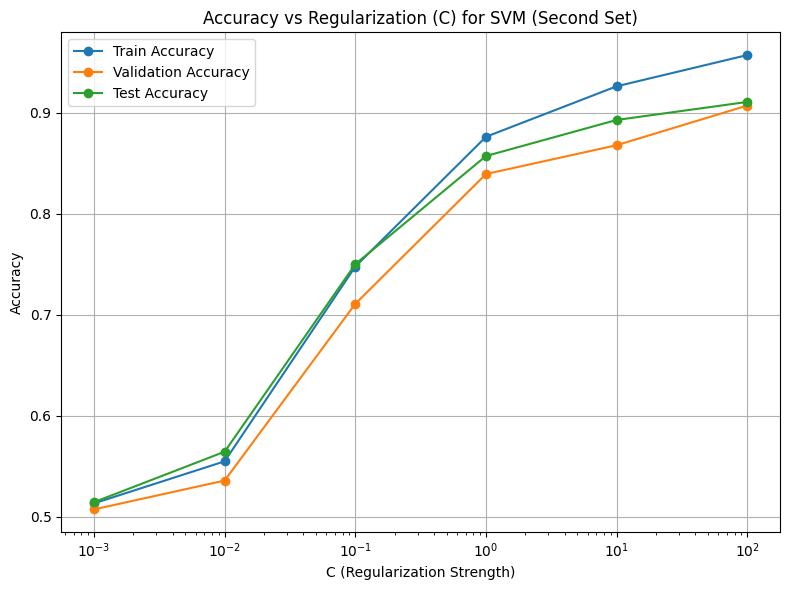

In [33]:
from sklearn import svm

for c in c_values:
    # initialize svc
    svm_polynomial = svm.SVC(kernel='poly', C=c, degree=3)

    # train model / fit to training data
    svm_polynomial.fit(X_train, y_train)

    print(f'C={c}:')

    # train accuracy
    train_prediction = svm_polynomial.predict(X_train)
    train_accuracy = np.mean(train_prediction == y_train)
    print(f'Train Accuracy: {train_accuracy}')

    # validation accuracy
    val_prediction = svm_polynomial.predict(X_val)
    val_accuracy = np.mean(val_prediction == y_val)
    print(f'Validation Accuracy: {val_accuracy}')

    # test accuracy
    test_prediction = svm_polynomial.predict(X_test)
    test_accuracy = np.mean(test_prediction == y_test)
    print(f'Test Accuracy: {test_accuracy}\n')

    # # make prediction based on X_val (new data)
    # prediction = svm_polynomial.predict(X_test)

    # # measure accuracy
    # accuracy = np.mean(prediction == y_test)
    # print(f'C={c}: {accuracy}')

train_accuracies_2 = [0.513095238095238, 0.5547619047619048, 0.7476190476190476, 0.8761904761904762, 0.9261904761904762, 0.9571428571428572]
val_accuracies_2 = [0.5071428571428571, 0.5357142857142857, 0.7107142857142857, 0.8392857142857143, 0.8678571428571429, 0.9071428571428571]
test_accuracies_2 = [0.5142857142857142, 0.5642857142857143, 0.75, 0.8571428571428571, 0.8928571428571429, 0.9107142857142857]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_accuracies_2, marker='o', label='Train Accuracy')
plt.plot(c_values, val_accuracies_2, marker='o', label='Validation Accuracy')
plt.plot(c_values, test_accuracies_2, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization (C) for SVM (Second Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    

### Radial Basis Function (RBF) Kernel

C=0.001:
Train Accuracy: 0.8654761904761905
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.8821428571428571

C=0.01:
Train Accuracy: 0.8654761904761905
Validation Accuracy: 0.8607142857142858
Test Accuracy: 0.8928571428571429

C=0.1:
Train Accuracy: 0.8892857142857142
Validation Accuracy: 0.9035714285714286
Test Accuracy: 0.9107142857142857

C=1:
Train Accuracy: 0.9202380952380952
Validation Accuracy: 0.9214285714285714
Test Accuracy: 0.9178571428571428

C=10:
Train Accuracy: 0.9488095238095238
Validation Accuracy: 0.925
Test Accuracy: 0.9428571428571428

C=100:
Train Accuracy: 0.9702380952380952
Validation Accuracy: 0.9071428571428571
Test Accuracy: 0.9178571428571428



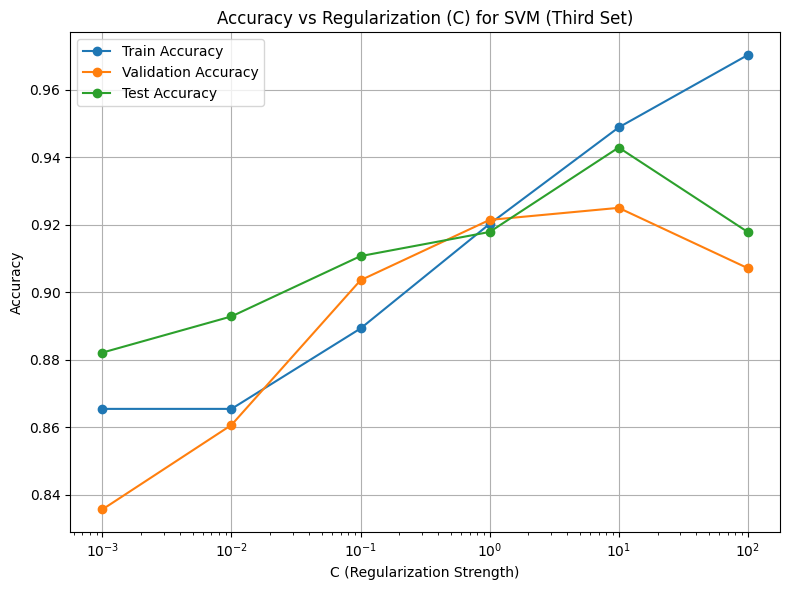

In [34]:
from sklearn import svm

for c in c_values:
    # initialize svc
    svm_radial = svm.SVC(kernel='rbf', C=c, degree=2)

    # train model / fit to training data
    svm_radial.fit(X_train, y_train)

    print(f'C={c}:')

    # train accuracy
    train_prediction = svm_radial.predict(X_train)
    train_accuracy = np.mean(train_prediction == y_train)
    print(f'Train Accuracy: {train_accuracy}')

    # validation accuracy
    val_prediction = svm_radial.predict(X_val)
    val_accuracy = np.mean(val_prediction == y_val)
    print(f'Validation Accuracy: {val_accuracy}')

    # test accuracy
    test_prediction = svm_radial.predict(X_test)
    test_accuracy = np.mean(test_prediction == y_test)
    print(f'Test Accuracy: {test_accuracy}\n')

    # # make prediction based on X_val (new data)
    # prediction = svm_radial.predict(X_val)

    # # # measure accuracy
    # # accuracy = np.mean(prediction == y_val)
    # # print(f'C={c}: {accuracy}')

# Third set of data
train_accuracies_3 = [0.8654761904761905, 0.8654761904761905, 0.8892857142857142, 0.9202380952380952, 0.9488095238095238, 0.9702380952380952]
val_accuracies_3 = [0.8357142857142857, 0.8607142857142858, 0.9035714285714286, 0.9214285714285714, 0.925, 0.9071428571428571]
test_accuracies_3 = [0.8821428571428571, 0.8928571428571429, 0.9107142857142857, 0.9178571428571428, 0.9428571428571428, 0.9178571428571428]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_accuracies_3, marker='o', label='Train Accuracy')
plt.plot(c_values, val_accuracies_3, marker='o', label='Validation Accuracy')
plt.plot(c_values, test_accuracies_3, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization (C) for SVM (Third Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 3: Binary Classification Using the Pegasos Algorithm

### SVM Objective Function

$\min \lambda/2 \lVert {\bf w}\rVert_2^2 + \sum_{i=1}^N\max(0,1-y^{(i)}({\bf w}^T{\bf x}^{(i)}+w_0)$ where $w_0=0$.  You don't need to include $w_0$ in your objective function.

In [17]:
def svm_objective(w, X, y, lambda1=.1):

    regularization_term = (lambda1 / 2) * np.dot(w, w)

    hinge_loss = np.maximum(0, 1 - y * np.dot(X,w))

    average_loss = np.mean(hinge_loss)

    result = regularization_term + average_loss
    
    return result

### Pegasos Algorithm

$
\text{if } y^{(i)}({\bf w}^T{\bf x}^{(i)}\ge 1)  \\ \\
$

$
\phantom{abcd} {\bf w} = {\bf w}-\alpha\lambda {\bf w}\\ \\
$

$
\text{else }  \\ \\
$

$
\phantom{abcd} {\bf w} = {\bf w}-\alpha(\lambda {\bf w}-y^{(i)}{\bf x}^{(i)}) 
$

In [18]:
# stochastic sub-gradient descent
def pegasos(X_train, y_train, lambda1=0.08, num_iters = 3):

    # Hyperparameters: threshold, lambda1
    
    # parameters
    N = X_train.shape[0]
    d = X_train.shape[1]

    t = 0
    # Initial weight vector
    w = np.ones((d,))

    for iter in range(num_iters):
        # Calculate and print the objective value
        print('Iteration %d. J: %.6f' % (iter, svm_objective(w, X_train, y_train)))

        for i in range (N):
            t = t + 1
            # Complete the following code to find w. This will require several lines of code.
            alpha = 1 / (lambda1 * t)    # learning rate

            if y_train[i] * np.dot(X_train[i], w) > 1:
                w = w - (alpha * lambda1 * w)            
            else:
                w = w - alpha * (lambda1 * w - y_train[i] * X_train[i])
        
    return w

### Train the binary classifiers using the Pegasos Algorithm

In [20]:
y_train = np.where(y_train == 1, 1, -1)
y_val = np.where(y_val == 1, 1, -1)

lambda1 = 0.01
num_iters = 1000

w = pegasos(X_train, y_train, lambda1, num_iters)

predictions = np.where(np.dot(X_val, w) >= 0, 1, -1)

accuracy = np.mean(predictions == y_val)
print('Validation Accuracy: ', accuracy)

Iteration 0. J: 1.435123
Iteration 1. J: 3.039938
Iteration 2. J: 0.950694
Iteration 3. J: 0.611790
Iteration 4. J: 0.511386
Iteration 5. J: 0.456198
Iteration 6. J: 0.433309
Iteration 7. J: 0.422314
Iteration 8. J: 0.411286
Iteration 9. J: 0.410106
Iteration 10. J: 0.401432
Iteration 11. J: 0.396186
Iteration 12. J: 0.394371
Iteration 13. J: 0.389711
Iteration 14. J: 0.385907
Iteration 15. J: 0.383133
Iteration 16. J: 0.383773
Iteration 17. J: 0.382343
Iteration 18. J: 0.378750
Iteration 19. J: 0.378438
Iteration 20. J: 0.377117
Iteration 21. J: 0.376217
Iteration 22. J: 0.375198
Iteration 23. J: 0.373977
Iteration 24. J: 0.373837
Iteration 25. J: 0.373638
Iteration 26. J: 0.372789
Iteration 27. J: 0.372871
Iteration 28. J: 0.373716
Iteration 29. J: 0.373254
Iteration 30. J: 0.370818
Iteration 31. J: 0.371156
Iteration 32. J: 0.370143
Iteration 33. J: 0.370149
Iteration 34. J: 0.369270
Iteration 35. J: 0.368653
Iteration 36. J: 0.368730
Iteration 37. J: 0.368782
Iteration 38. J: 0.367